# 📚 Imports

In [26]:
import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
import collections
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 📖 Data

In [2]:
df = pd.read_csv('data/New_Delhi_reviews.csv')

In [3]:
df.head()

,rating_review,review_full
0,5,"Totally in love with the Auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147581 entries, 0 to 147580
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating_review  147581 non-null  int64 
 1   review_full    147579 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [5]:
df.isna().sum()

rating_review    0
review_full      2
dtype: int64

In [6]:
df.dropna(inplace = True)

# 🧮 Reviews Frequency

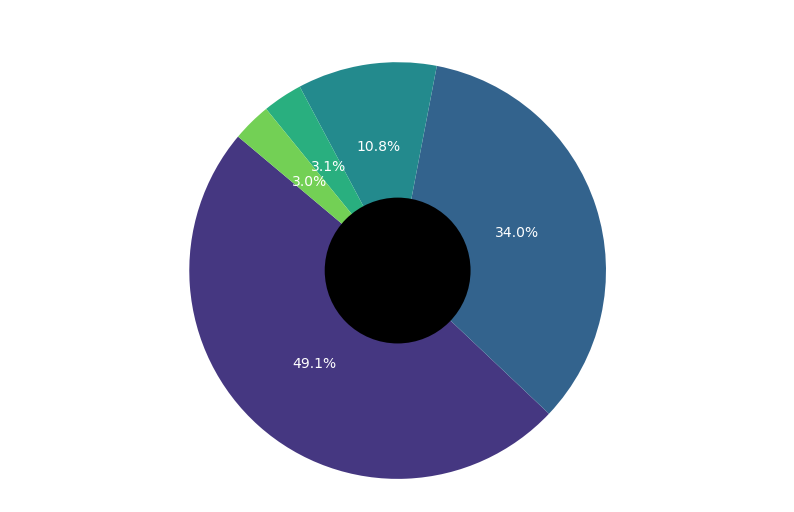

In [7]:
plt.figure(figsize = (10, 6))
plt.style.use('dark_background')

ratings = df['rating_review'].value_counts()

labels = ratings.index
sizes = ratings.values
colors = ['#453781', '#33638D', '#238A8D', '#29AF7F', '#73D055']

plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 140)

centre_circle = plt.Circle((0, 0), 0.35, fc = 'black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Reviews', fontsize = 20)

plt.axis('equal')
plt.show()


# Data Cleaning

### These cleaning steps help to reduce noise and standardize the text, making it better suited for text analysis such as sorting, grouping, information extraction, or any other subsequent processing.

In [8]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove special characters and make it lower case
    text = re.sub(r'[^a-zA-ZÀ-ú\s]', '', text.lower())
    # Tokenization
    tokens = text.split()
    # Remove numbers
    tokens = [token for token in tokens if not token.isdigit()]
    # Remove punctuation
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    # Remove extra whitespace
    tokens = [token.strip() for token in tokens]
    # Remove two letter words
    tokens = [token for token in tokens if len(token) > 2]
    # Join the tokens back into a single text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [9]:
df['clean_text'] = [clean_text(text) for text in df['review_full']]
df.head()

,rating_review,review_full,clean_text
0,5,"Totally in love with the Auro of the place, re...",totally love with the auro the place really be...
1,5,I went this bar 8 days regularly with my husba...,went this bar days regularly with husband are ...
2,5,We were few friends and was a birthday celebra...,were few friends and was birthday celebration ...
3,5,Fatjar Cafe and Market is the perfect place fo...,fatjar cafe and market the perfect place for c...
4,5,"Hey Guys, if you are craving for pizza and sea...",hey guys you are craving for pizza and searchi...


# Remove Stop Words

### Stop word removal is important for improving the efficiency and relevance of text reviews by eliminating common words that generally do not contribute to the meaning or context of the message.

In [10]:
# Tokenization
df['clean_text'] = df['clean_text'].apply(word_tokenize)

# Removing stopwords
stop_words = set(stopwords.words('english'))
df['clean_text'] = df['clean_text'].apply(lambda x: [word for word in x if word not in stop_words])

# Word Normalization

### Normalization is a process of transforming words into a common or standardized form in order to reduce variation and simplify text analysis.

In [11]:
# Word normalization
stemmer = SnowballStemmer('english')
df['clean_text'] = df['clean_text'].apply(lambda x: [stemmer.stem(word) for word in x])

# Joining the words back into a single text
df['final_text'] = df['clean_text'].apply(lambda x: ' '.join(x))

# What Most People Say of all reviews

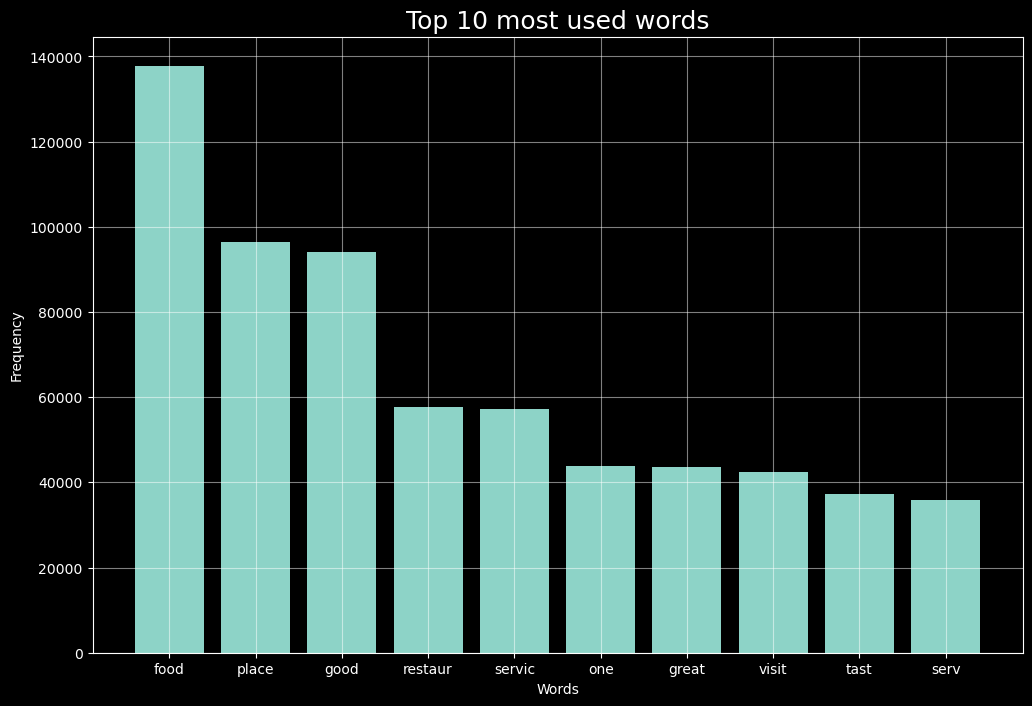

In [12]:
words = []
for text in df['final_text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Dark Background and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

<Figure size 1200x800 with 0 Axes>

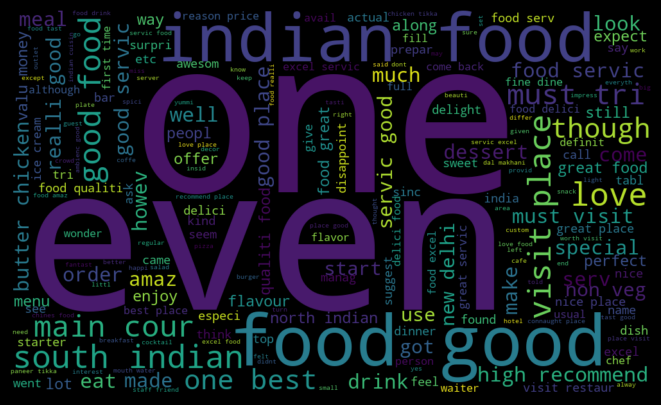

In [13]:
all_text = ' '.join(df['final_text'])

# Dark Background and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# Create the WordCloud object
wordcloud = WordCloud(width = 1000, height = 600, background_color = 'black').generate(all_text)

# Plot the wordcloud
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# What Most People Say About 1 Rating Review

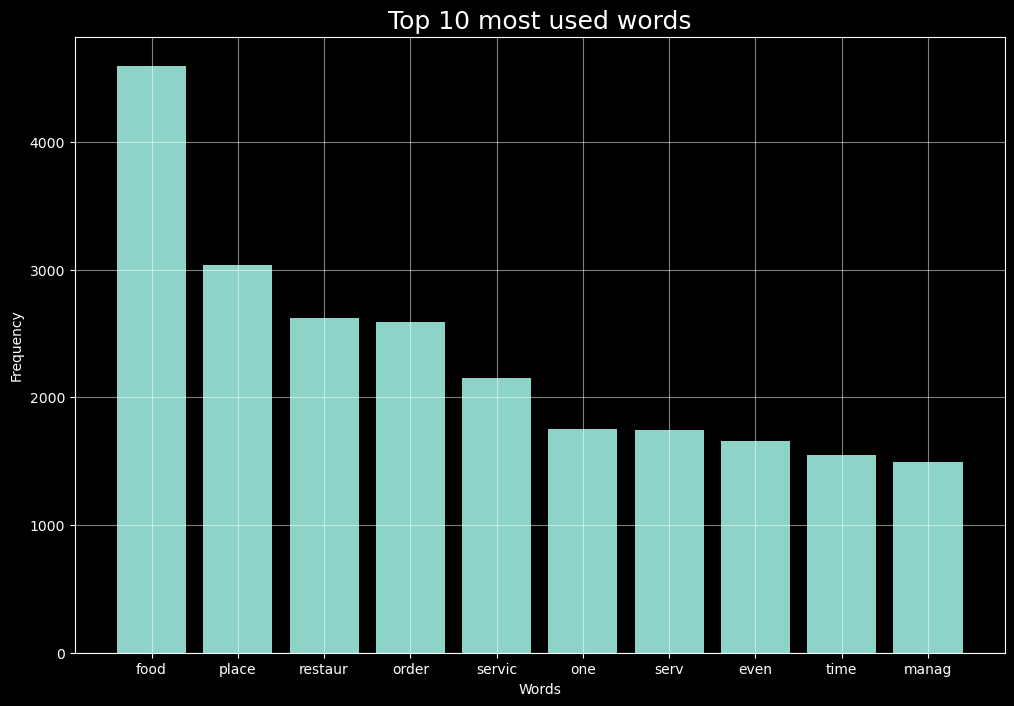

In [14]:
words = []
for text, rating in zip(df['final_text'], df['rating_review']):
    if rating == 1:
        words.extend(text.split())

word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Dark Background and figure size
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align='center')

plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

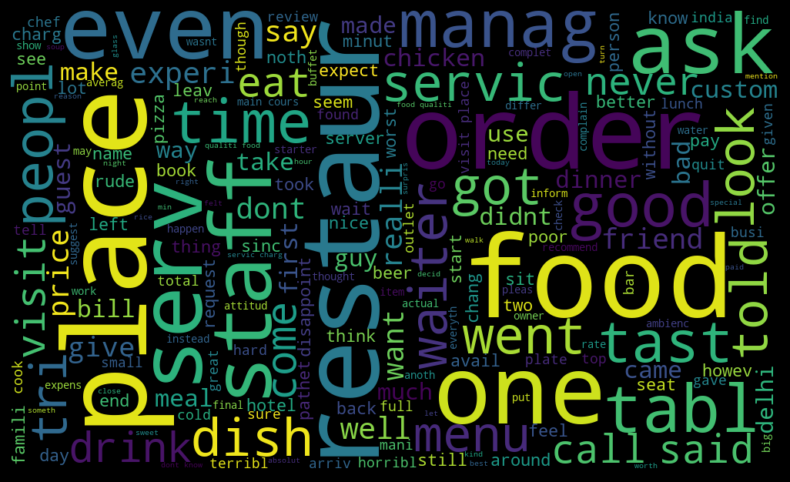

In [15]:
texts_rating_1 = df[df['rating_review'] == 1]['final_text']

# Juntar os textos em uma única string
full_text = ' '.join(texts_rating_1)

# Criar a nuvem de palavras
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 150, background_color = 'black').generate(full_text)

# Plotar a nuvem de palavras
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# What Most People Say About 2 Rating Review

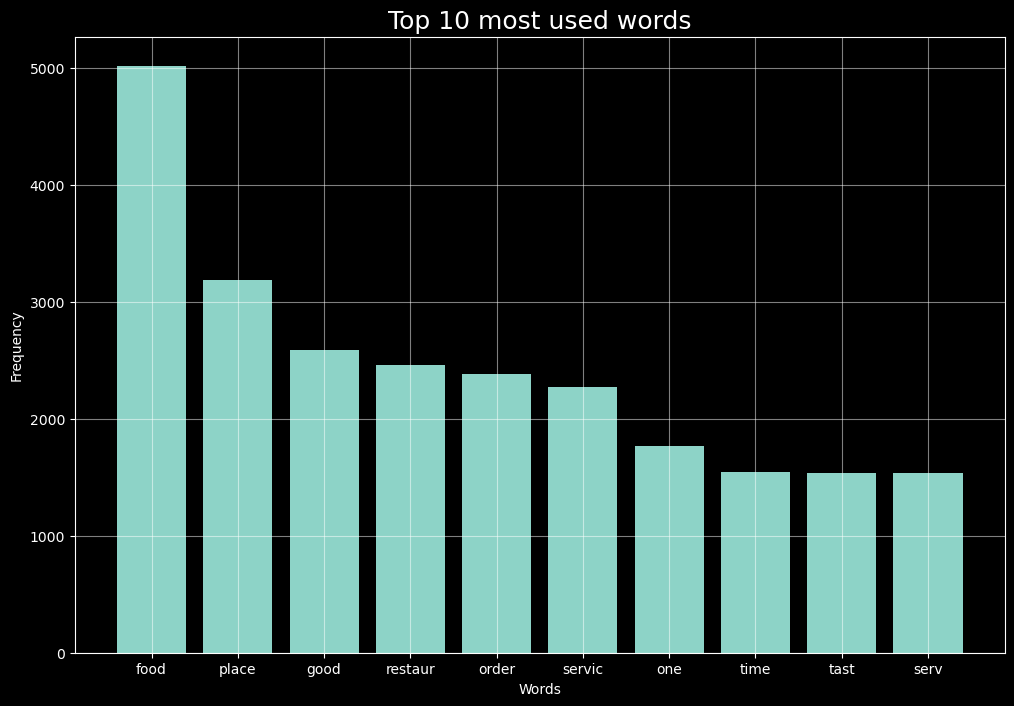

In [16]:
words = []
for text, rating in zip(df['final_text'], df['rating_review']):
    if rating == 2:
        words.extend(text.split())

word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Dark Background and figure size
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align='center')

plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()


(-0.5, 999.5, 599.5, -0.5)

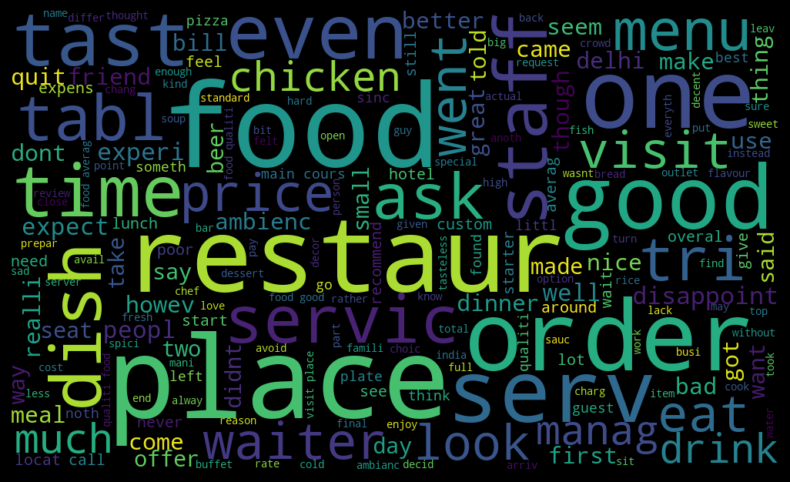

In [17]:
texts_rating_1 = df[df['rating_review'] == 2]['final_text']

# Juntar os textos em uma única string
full_text = ' '.join(texts_rating_1)

# Criar a nuvem de palavras
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 150, background_color = 'black').generate(full_text)

# Plotar a nuvem de palavras
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

# What Most People Say About 3 Rating Review

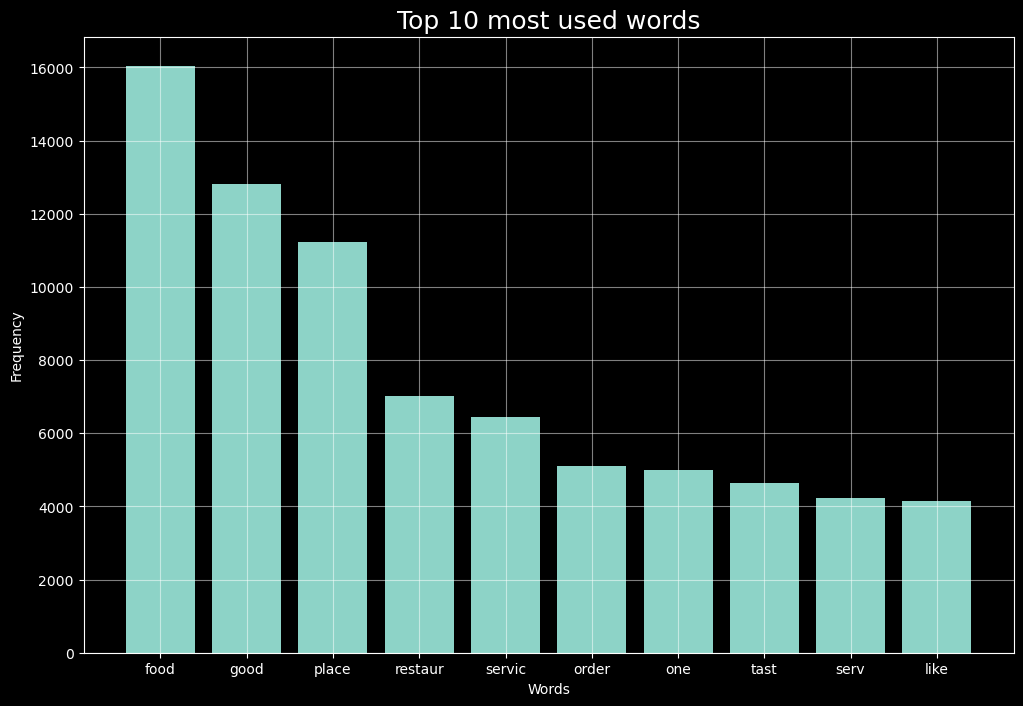

In [18]:
words = []
for text, rating in zip(df['final_text'], df['rating_review']):
    if rating == 3:
        words.extend(text.split())

word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Dark Background and figure size
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align='center')

plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()


(-0.5, 999.5, 599.5, -0.5)

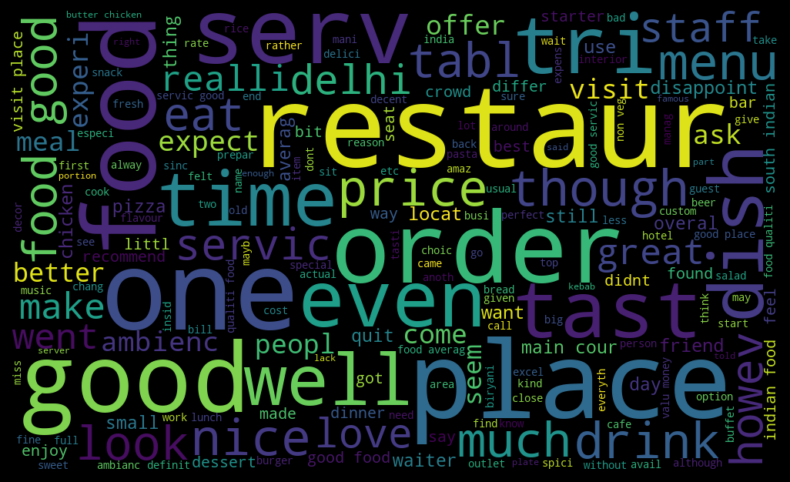

In [19]:
texts_rating_1 = df[df['rating_review'] == 3]['final_text']

# Juntar os textos em uma única string
full_text = ' '.join(texts_rating_1)

# Criar a nuvem de palavras
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 150, background_color = 'black').generate(full_text)

# Plotar a nuvem de palavras
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

# What Most People Say About 4 Rating Review

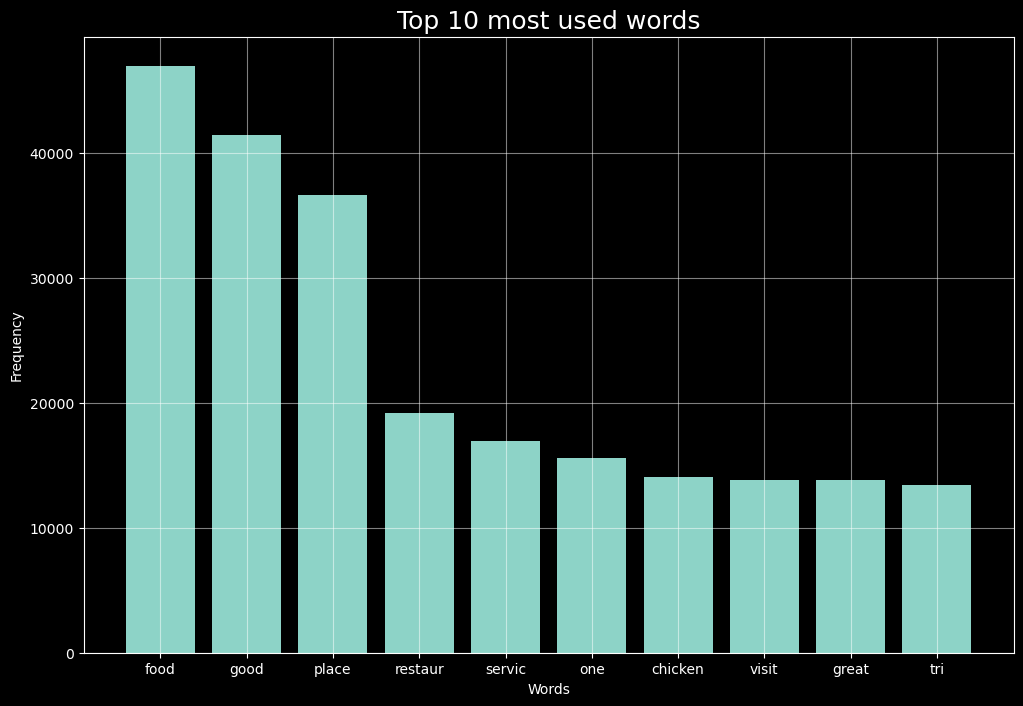

In [20]:
words = []
for text, rating in zip(df['final_text'], df['rating_review']):
    if rating == 4:
        words.extend(text.split())

word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Dark Background and figure size
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align='center')

plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()


(-0.5, 999.5, 599.5, -0.5)

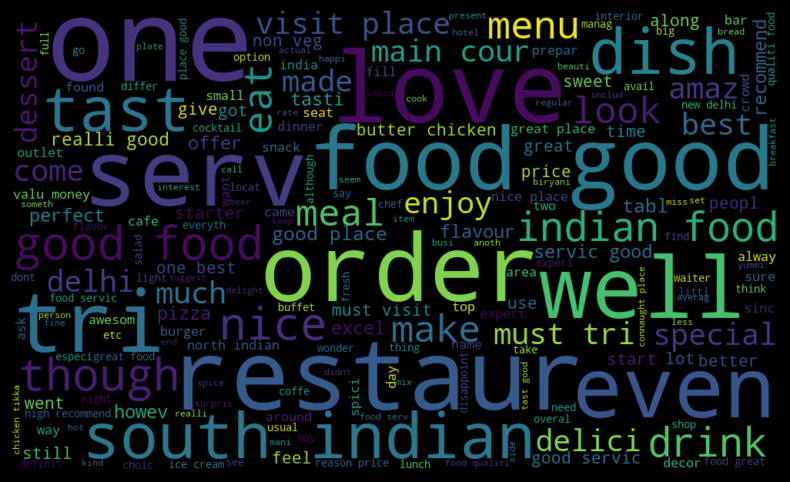

In [21]:
texts_rating_1 = df[df['rating_review'] == 4]['final_text']

# Juntar os textos em uma única string
full_text = ' '.join(texts_rating_1)

# Criar a nuvem de palavras
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 150, background_color = 'black').generate(full_text)

# Plotar a nuvem de palavras
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

# What Most People Say About 5 Rating Review

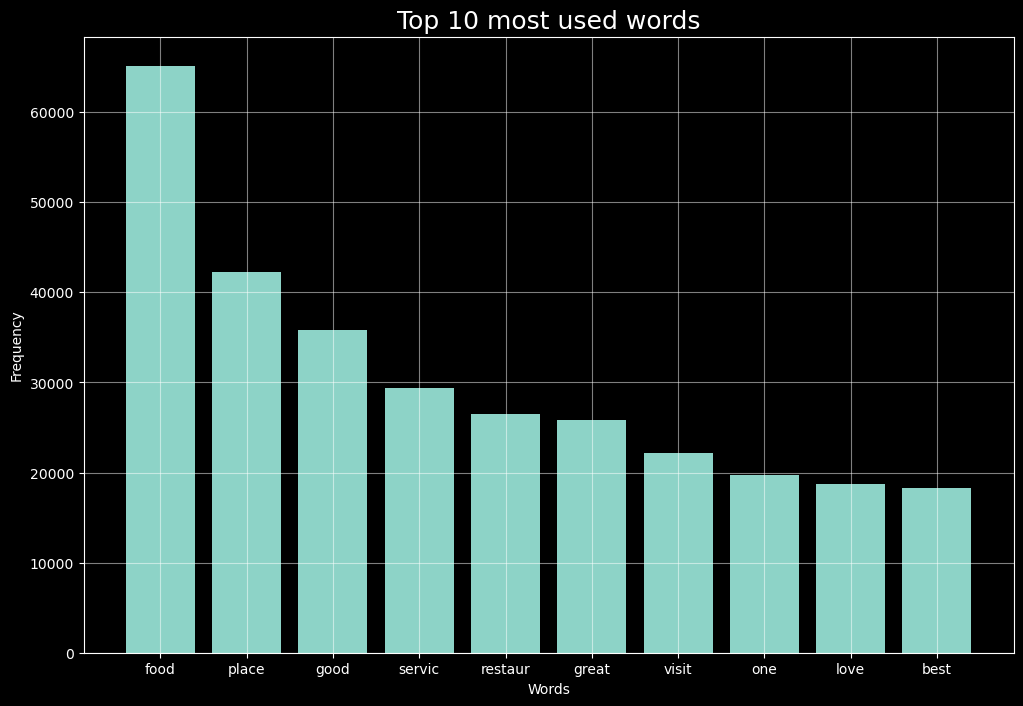

In [22]:
words = []
for text, rating in zip(df['final_text'], df['rating_review']):
    if rating == 5:
        words.extend(text.split())

word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Dark Background and figure size
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align='center')

plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()


(-0.5, 999.5, 599.5, -0.5)

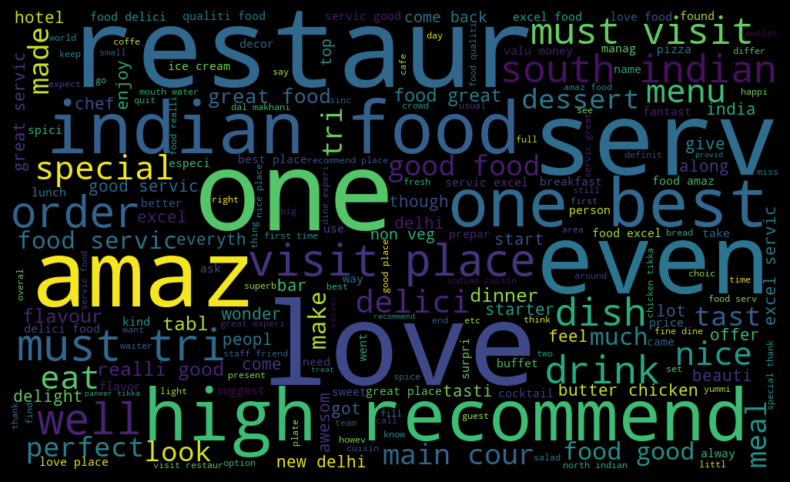

In [23]:
texts_rating_1 = df[df['rating_review'] == 5]['final_text']

# Juntar os textos em uma única string
full_text = ' '.join(texts_rating_1)

# Criar a nuvem de palavras
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 150, background_color = 'black').generate(full_text)

# Plotar a nuvem de palavras
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

# 📋 Insights:

- In all charts with less than 3 in the ranking, some of the most used keywords were Food, Place, Service, Time, Order among others, that is, many people complain, this can be a detail to improve.
- One of the most used words rated 4 is chicken haha.
- The 5 ratings have the most used words like Best, Love and Good, which is an interesting point that means that the people who take a 5 as a rating (which is most people) really liked it a lot and will probably come back.
---

# 🧬 Converting text to numerical and Split the data

In [24]:
X = np.array(df['final_text'])

# Convert text to numerical
cv = CountVectorizer()
X = cv.fit_transform(X)

xtrain, xtest, ytrain, ytest = train_test_split(X, df['rating_review'], test_size = 0.20, random_state = 0)

# 🤖 Chosing the model and Predicting

In [27]:
# Model
mnb = MultinomialNB()
mnb.fit(xtrain, ytrain)

# Predicting
pred_mnb = mnb.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest, pred_mnb)}')

Accuracy: 0.623390703347337


---
## With these results and training, the model is able to predict what the classification will be with almost 62% accuracy. Now, to make it more precise, I will classify all ratings less than 3 as negative and greater than 3 as positive.
---

# 🙂🙁 Sentiment Classification of reviews

In [28]:
# @youssifhisham

def sentiment_analysis(text):
    if text <= 3: # Negative review
        return 0 
    else: 
        return 1 # Positive review
df['sentiment'] = df['rating_review'].apply(sentiment_analysis)

# ✂️ Split the data with the column "sentiment"

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(X, df['sentiment'], test_size = 0.20, random_state = 0)

# 📝 Predicting

In [30]:
# Model
mnb = MultinomialNB()
mnb.fit(xtrain, ytrain)

# Predicting
pred_mnb = mnb.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest, pred_mnb)}')

Accuracy: 0.8863328364277002


## With this, we have a good result where the model can classify whether the evaluation is positive or negative (considering 3 or below as negative)
---

# 😁 Thank you! Feel free to criticize! 👋🏼